# Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the **SelectKBest** class that can be used with a suite of different satatistical tests to select a specific number of features.

The example below used the chi-squared (chi2) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Importing the dataset

!pip install opendatasets --upgrade --quiet

import opendatasets as od
od.download('https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: venupodugu
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 70.6k/70.6k [00:00<00:00, 1.53MB/s]

In [3]:
data = pd.read_csv('./mobile-price-classification/train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# Extracting Independent and Dependent features

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X.shape, y.shape

((2000, 20), (2000,))

In [8]:
# Apply SelectKBest class to extract top 10 best features

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,y)

In [9]:
dfscores = pd.DataFrame(fit.scores_)
dfscores.head()

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166


In [10]:
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [12]:
# Concat the above two dataframes for better visualuzation

feature_scores = pd.concat([dfcolumns, dfscores], axis=1)

# Naming the dataframe columns

feature_scores.columns = ['Specs', 'Score']

In [13]:
feature_scores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [14]:
feature_scores.nlargest(10, 'Score')

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt calss that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [17]:
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [18]:
# Use inbuilt class feature_importances_ of tree based classifiers

model.feature_importances_

array([0.06237029, 0.01988719, 0.03216136, 0.01941816, 0.03253581,
       0.01605747, 0.03470576, 0.03320879, 0.03579259, 0.03313028,
       0.03304201, 0.04795856, 0.04776477, 0.40075818, 0.03345362,
       0.03298204, 0.03342647, 0.01411518, 0.01748426, 0.0197472 ])

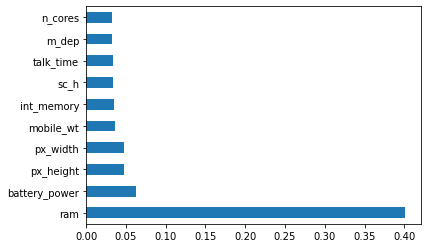

In [32]:
# Plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Correlation Matrix with Heatmap
Correlation states how the features are related to each other or to the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

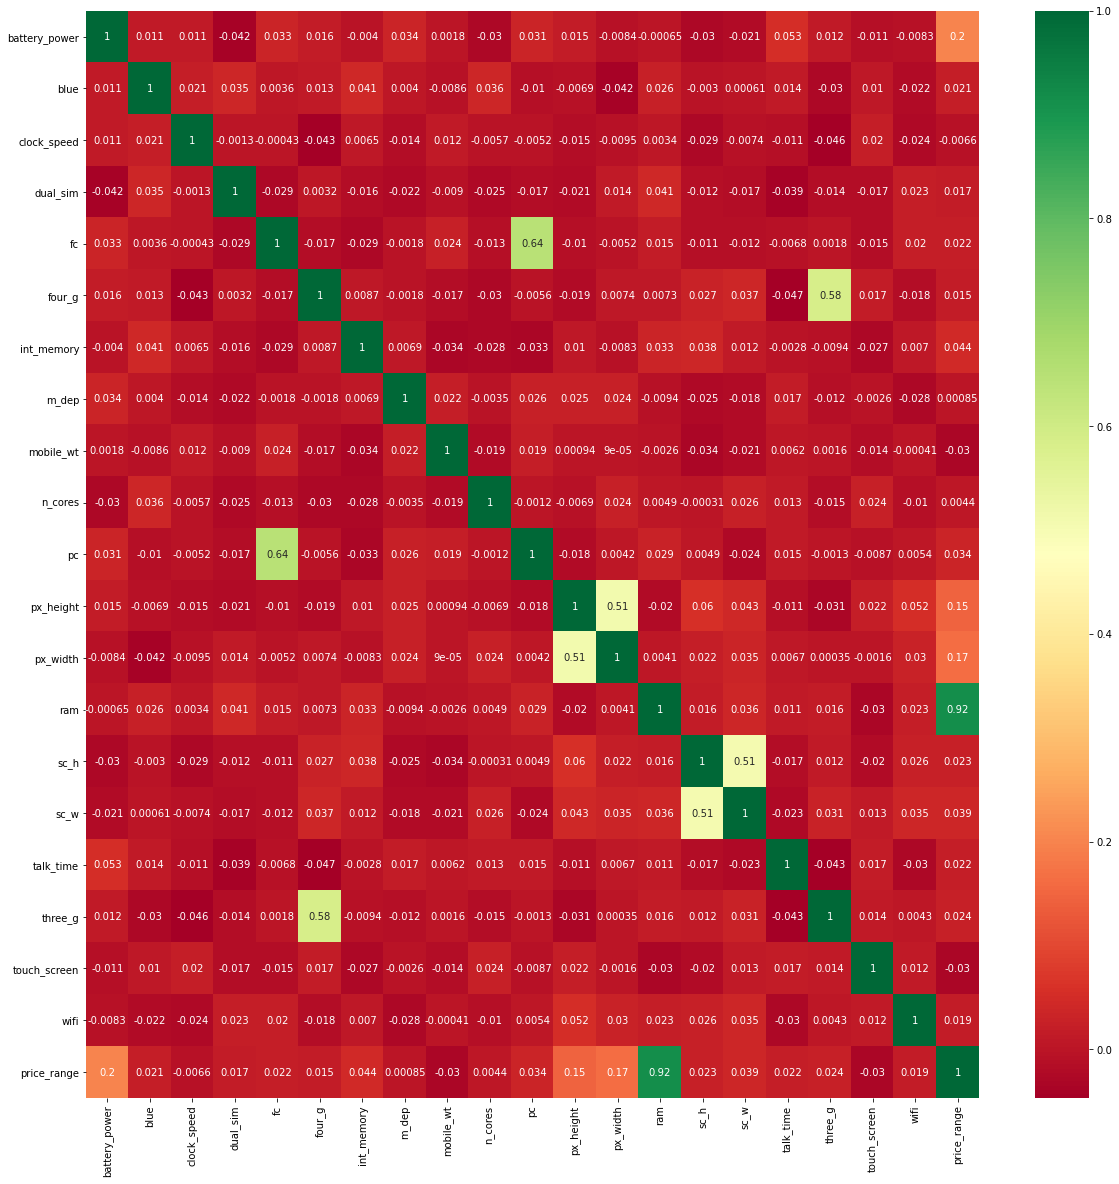

In [27]:
import seaborn as sns

# Get correlations of each feature in dataset

plt.figure(figsize = (20,20))

# Plot heatmap

g = sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

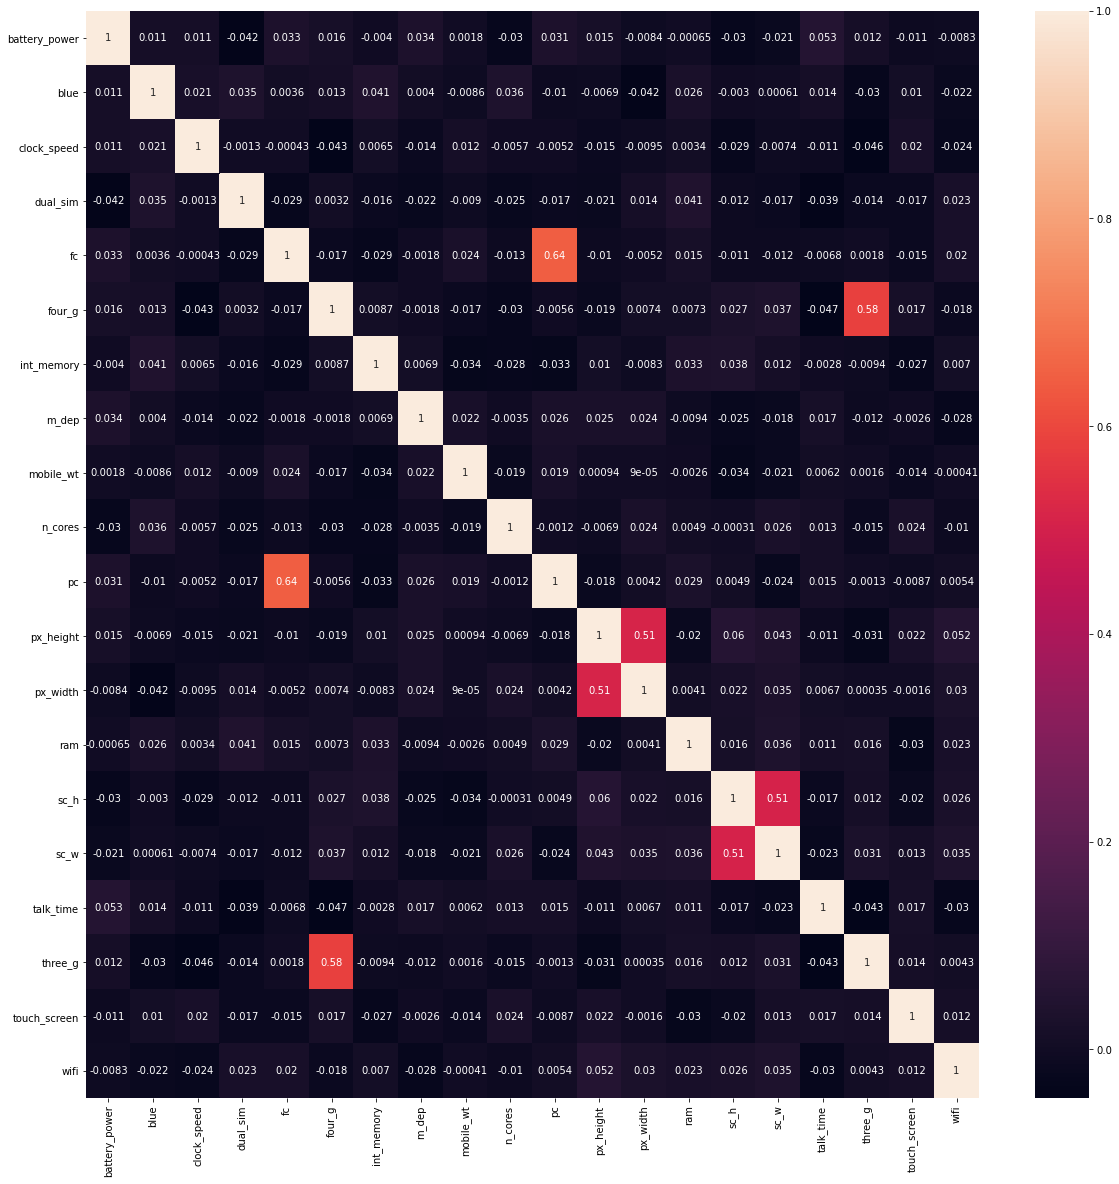

In [45]:
plt.figure(figsize = (20,20))
sns.heatmap(X.corr(), annot=True)

In [ ]:
# Find and remove correlated features

def correlation(dataset, threshold):
    
    # Set of all the names of correlated columns
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # We are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                
                

In [33]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Removing the correlated features

In [41]:
threshold = 0.5

In [42]:
# Find and remove correlated features

def correlation(dataset, threshold):
    
    # Set of all the names of correlated columns
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # We are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # Getting the name of the column
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                

In [46]:
# Extracting Highly correlated features

correlation(data.iloc[:, :-1], threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

## Information gain

In [54]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)


In [55]:
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.844632
battery_power    0.033682
px_width         0.028665
px_height        0.022815
four_g           0.020349
sc_h             0.018797
int_memory       0.015585
talk_time        0.014427
fc               0.009366
three_g          0.006127
clock_speed      0.002051
mobile_wt        0.000516
blue             0.000000
dual_sim         0.000000
wifi             0.000000
m_dep            0.000000
touch_screen     0.000000
pc               0.000000
sc_w             0.000000
n_cores          0.000000
dtype: float64